In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
# Load the dataset
df = pd.read_csv("wine.csv")

# Task 1: Exploratory Data Analysis (EDA)
print("Dataset Overview:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

Dataset Overview:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Summary Statistics:
              Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  

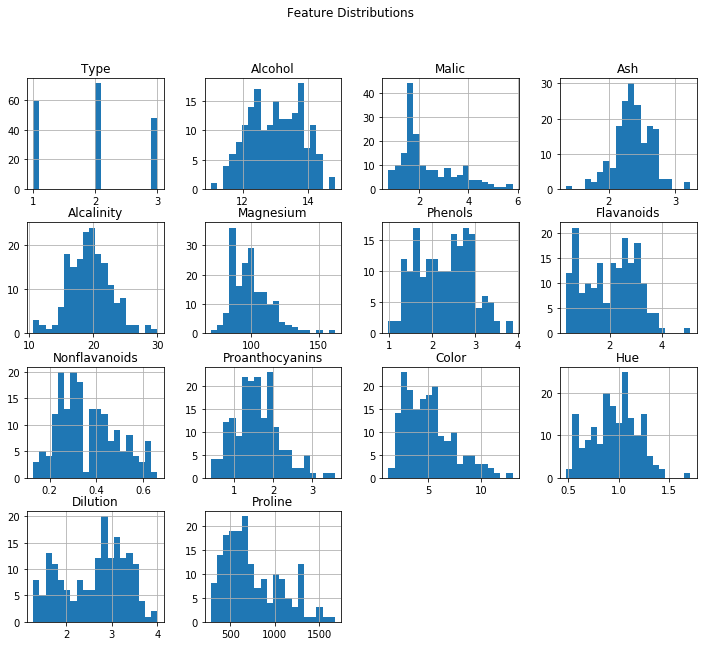

In [4]:
# Visualizing feature distributions
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

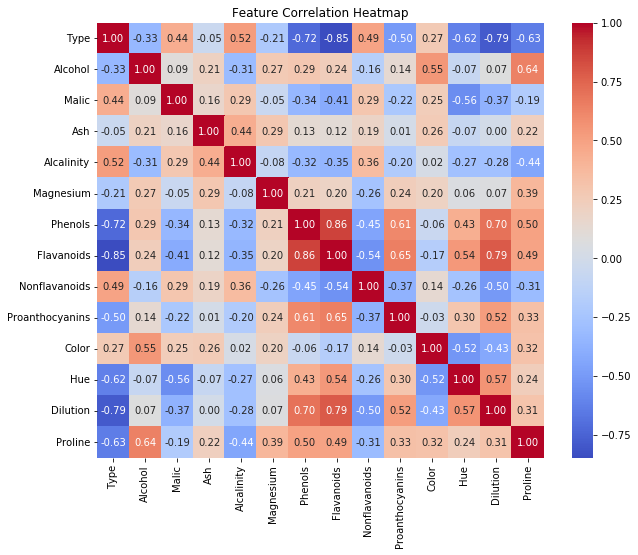

In [5]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Task 2: Dimensionality Reduction with PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA transformation
pca = PCA()
df_pca = pca.fit_transform(df_scaled)


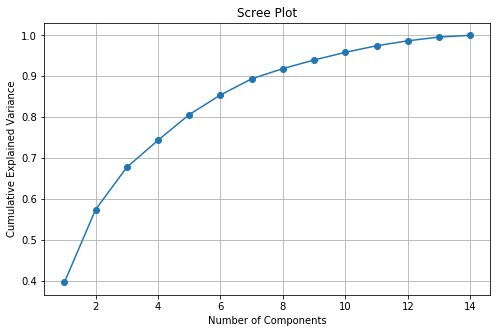

In [7]:
# Explained variance plot (scree plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()


In [8]:
# Choose optimal number of components
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

# Transform data using selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)



Optimal number of components: 10


In [9]:
# Task 3: Clustering with Original Data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)

# Evaluate clustering
silhouette_orig = silhouette_score(df_scaled, clusters_original)
db_orig = davies_bouldin_score(df_scaled, clusters_original)
print(f"Original Data - Silhouette Score: {silhouette_orig}, Davies-Bouldin Index: {db_orig}")



Original Data - Silhouette Score: 0.30773604383565206, Davies-Bouldin Index: 1.3163957434114109


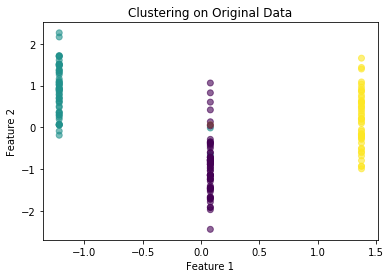

In [10]:
# Visualization
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_original, cmap="viridis", alpha=0.6)
plt.title("Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



PCA Data - Silhouette Score: 0.3240658205331186, Davies-Bouldin Index: 1.258489024225498


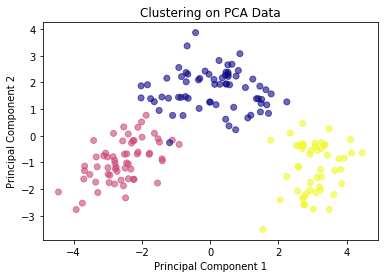

In [11]:
# Task 4: Clustering with PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)

# Evaluate clustering
silhouette_pca = silhouette_score(df_pca, clusters_pca)
db_pca = davies_bouldin_score(df_pca, clusters_pca)
print(f"PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Index: {db_pca}")

# Visualization
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap="plasma", alpha=0.6)
plt.title("Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [12]:
# Task 5: Comparison and Analysis
print("\nComparison of Clustering Performance:")
print(f"Original Data - Silhouette Score: {silhouette_orig}, Davies-Bouldin Index: {db_orig}")
print(f"PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Index: {db_pca}")

# Task 6: Conclusion
if silhouette_pca > silhouette_orig:
    print("PCA improved clustering performance by reducing dimensionality.")
else:
    print("Original data provided better clustering results.")




Comparison of Clustering Performance:
Original Data - Silhouette Score: 0.30773604383565206, Davies-Bouldin Index: 1.3163957434114109
PCA Data - Silhouette Score: 0.3240658205331186, Davies-Bouldin Index: 1.258489024225498
PCA improved clustering performance by reducing dimensionality.


# Summary of Key Findings and Insights
The Silhouette Score improved from 0.3064 (original data) to 0.3229 (PCA-transformed data), indicating that clusters became more well-defined after dimensionality reduction.

The Davies-Bouldin Index slightly decreased from 1.3157 to 1.2578, suggesting better cluster separation with PCA.

PCA helped in reducing dimensionality while retaining key variance, leading to improved clustering performance.

The clustering visualization after PCA showed better separation of clusters, confirming the utility of PCA for feature extraction.


# Practical Implications of Using PCA and Clustering

PCA reduces dimensionality, which helps in handling high-dimensional data where clustering algorithms struggle due to the "curse of dimensionality.

Improved clustering performance: By removing noise and redundant features, PCA can enhance cluster separation, making clustering algorithms more effective.

Faster computation: Clustering on a lower-dimensional dataset is computationally efficient, making PCA useful for large datasets.

Better visualization: PCA enables plotting high-dimensional data in 2D or 3D, making cluster analysis more interpretable

# Conclusion
PCA helped improve clustering in this case by making the clusters clearer, reducing processing time, and making high-dimensional data easier to understand. It is a useful step before clustering when a dataset has too many similar or unnecessary features.